# Discovering Correlations

### Introduction

In the last lesson, we learned how correlations can help us with reducing our number of features.  The pearson correlation tells us the strength of a linear relationship between features, and the spearman correlation coefficient captures the strength of some non-linear relationships.  

In this lesson, we'll learn some other techniques that pandas provides us to discover features with strong correlations.

### Loading our Data

Let's continue with the boston housing dataset.  We previously used eli5 to find the most important features.  Let's load our data, and reduce to our top ten features.

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

data = load_boston()
X_data = data['data']
X = pd.DataFrame(X_data, columns = data['feature_names'])
selected_feats = ['LSTAT', 'DIS', 'RAD', 'RM', 'PTRATIO', 'NOX', 'TAX', 'ZN', 'CRIM',
       'CHAS']
X_reduced = X[selected_feats]
y = data['target']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, random_state=42)

We can see that we reduced the number of features from 13 to 10.

In [8]:
X.shape, X_train.shape

((506, 13), (339, 10))

This time our dataset has thirteen features and 506 observations.  Now let's fit an initial model.

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7336244309845095

### Exploring Relationships between Features

Now one way to quickly plot the relationships between features is with the `scatter_matrix`.  

scatter matrix


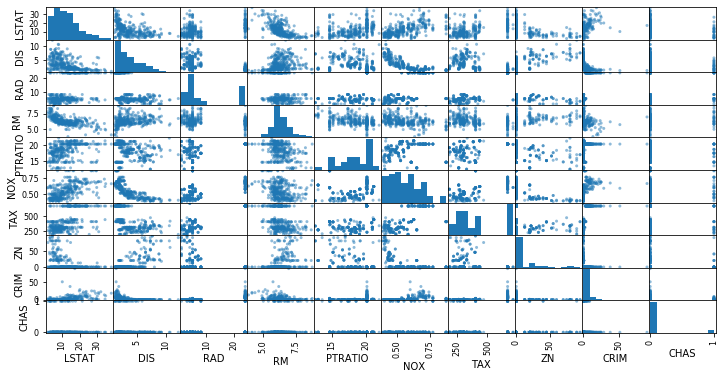

In [10]:
pd.plotting.scatter_matrix(X_train, figsize = (12, 6))
print('scatter matrix')

The scatter matrix displays the relationship between each of the variables provided.  Along the diagonal, it displays the histogram of the feature.

Ok, so when looking at the scatter matrix we are looking for those that tend to have a relationship between each other - either linear or nonlinear.  This generally means that we should only need to include one of these features -- as they are both capturing similar movement in the data.  We don't need to track this movement twice.

### Plotting Correlation Matrices

As we know, we tend to prefer the spearman correlation, as it can also capture non-linear relationships.  Let's display the spearman correlation for all features.  

In [11]:
spearman_corr = X_train.corr(method = 'spearman')
spearman_corr

,LSTAT,DIS,RAD,RM,PTRATIO,NOX,TAX,ZN,CRIM,CHAS
LSTAT,1.000000,-0.539370,0.379172,-0.656932,0.462996,0.629874,0.507469,-0.479661,0.601926,-0.113219
DIS,-0.539370,1.000000,-0.476736,0.299277,-0.316071,-0.884252,-0.569358,0.638552,-0.754108,-0.097927
RAD,0.379172,-0.476736,1.000000,-0.123491,0.322810,0.575957,0.697572,-0.283635,0.734165,0.070388
RM,-0.656932,0.299277,-0.123491,1.000000,-0.326848,-0.337093,-0.291831,0.386185,-0.304114,0.103250
PTRATIO,0.462996,-0.316071,0.322810,-0.326848,1.000000,0.364046,0.436683,-0.422623,0.419662,-0.096540
NOX,0.629874,-0.884252,0.575957,-0.337093,0.364046,1.000000,0.648858,-0.658677,0.828005,0.089791
TAX,0.507469,-0.569358,0.697572,-0.291831,0.436683,0.648858,1.000000,-0.374154,0.719077,-0.008973
ZN,-0.479661,0.638552,-0.283635,0.386185,-0.422623,-0.658677,-0.374154,1.000000,-0.588606,-0.036551
CRIM,0.601926,-0.754108,0.734165,-0.304114,0.419662,0.828005,0.719077,-0.588606,1.000000,0.059639
CHAS,-0.113219,-0.097927,0.070388,0.103250,-0.096540,0.089791,-0.008973,-0.036551,0.059639,1.000000


Notice that the correlation is 1 diagonally, as this is the correlation of a feature with itself.  It's difficult to spot the higher correlations, so we can use a heatmap from seaborn to help us out.

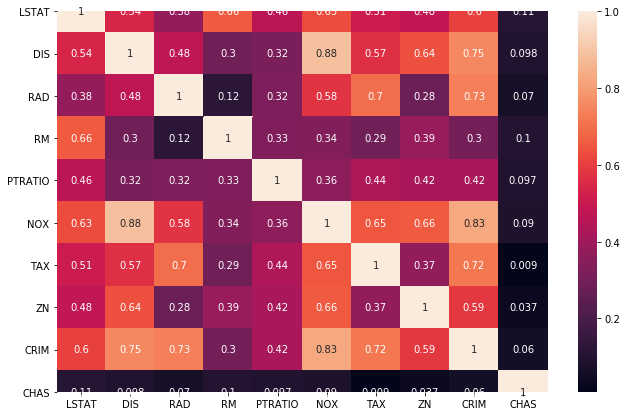

In [27]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig.set_size_inches(11, 7)
ax = fig.add_subplot(111)

sn.heatmap(np.abs(spearman_corr), annot=True, ax = ax)

> We plotted **absolute value of the spearman correlation** so that we only have to look for lighter colors.

So the lighter the colors, the higher the correlation.

### Selecting Top Correlations

When we have more features, we can miss our top correlations even with the color coding.  Instead of using the correlation matrix, we can simply choose those columns that have some high correlations.  To do this, let's count the number of correlations a feature has beyond a threshold, say $abs(.70)$, and sort from most to least.

> First we can find values greater than .70.

In [110]:
(np.abs(spearman_corr) > .70)

,LSTAT,DIS,RAD,RM,PTRATIO,NOX,TAX,ZN,CRIM,CHAS
LSTAT,True,False,False,False,False,False,False,False,False,False
DIS,False,True,False,False,False,True,False,False,True,False
RAD,False,False,True,False,False,False,False,False,True,False
RM,False,False,False,True,False,False,False,False,False,False
PTRATIO,False,False,False,False,True,False,False,False,False,False
NOX,False,True,False,False,False,True,False,False,True,False
TAX,False,False,False,False,False,False,True,False,True,False
ZN,False,False,False,False,False,False,False,True,False,False
CRIM,False,True,True,False,False,True,True,False,True,False
CHAS,False,False,False,False,False,False,False,False,False,True


Then we can find the amount features each feature exceeds that threshold with. 

In [109]:
(np.abs(spearman_corr) > .70).sum(axis = 0).sort_values(ascending = False)

CRIM       5
NOX        3
DIS        3
TAX        2
RAD        2
CHAS       1
ZN         1
PTRATIO    1
RM         1
LSTAT      1
dtype: int64

We know that each feature will have at least one highly correlated value (with itself), so we really care about the features that have more than one.  We see that `CRIM`, `NOX` and `DIS` have the highest correlations.

Let's display our correlations again, this time limiting to those features with more than 1 high correlation.

In [114]:
top_corr_cols = (np.abs(spearman_corr) > .70).sum(axis = 0).sort_values(ascending = False)[:5].index
top_corr_cols

Index(['CRIM', 'NOX', 'DIS', 'TAX', 'RAD'], dtype='object')

In [116]:
X_train[top_corr_cols].corr(method = 'spearman')

,CRIM,NOX,DIS,TAX,RAD
CRIM,1.000000,0.828005,-0.754108,0.719077,0.734165
NOX,0.828005,1.000000,-0.884252,0.648858,0.575957
DIS,-0.754108,-0.884252,1.000000,-0.569358,-0.476736
TAX,0.719077,0.648858,-0.569358,1.000000,0.697572
RAD,0.734165,0.575957,-0.476736,0.697572,1.000000


Let's try dropping these features one by one.

In [118]:
scores = []
for col in top_corr_cols:
    X_pruned = X_reduced.drop(columns = col)
    X_train, X_test, y_train, y_test = train_test_split(X_pruned, y, test_size=0.33, random_state=42)
    score = LinearRegression().fit(X_train, y_train).score(X_test, y_test)
    scores.append((col, score))

In [119]:
scores

[('CRIM', 0.7290747576044878),
 ('NOX', 0.7125182079097102),
 ('DIS', 0.6808017020070887),
 ('TAX', 0.7191985045254733),
 ('RAD', 0.7130628894115005)]

We can see that the scores barely budget until distance is removed.  Next we can experiment with removing more columns.  We can get a fairly high score by removing CRIM, RAD, and TAX, so that is what we'll do.

In [131]:
cols = ['CRIM', 'RAD', 'TAX']
X_pruned = X_reduced.drop(columns = cols)
X_train, X_test, y_train, y_test = train_test_split(X_pruned, y, test_size=0.33, random_state=42)
model = LinearRegression().fit(X_train, y_train)
model.score(X_test, y_test)

0.7139500122498286

This leaves us with the following features.

In [130]:
X_pruned.columns

Index(['LSTAT', 'DIS', 'RM', 'PTRATIO', 'NOX', 'ZN', 'CHAS'], dtype='object')

And the following feature importances.

In [133]:
from eli5.sklearn import PermutationImportance
import eli5
import numpy as np

perm = PermutationImportance(model).fit(X_test, y_test)

exp_df = eli5.explain_weights_df(perm, feature_names = list(X_train.columns))
exp_df

,feature,weight,std
0,LSTAT,0.457930,0.037352
1,DIS,0.185703,0.016349
2,RM,0.177273,0.019621
3,NOX,0.105324,0.010989
4,PTRATIO,0.091350,0.014359
5,CHAS,0.012081,0.006312
6,ZN,0.011868,0.003453


Compare this to our earlier lab, and notice by removing collinear features, we have even more weight on LSTAT.

<img src="./feat-imp.png" width="20%">

## Summary

In this lesson, we saw how we can use the spearman correlation metric to detect linear and nonlinear relationship between variables.  We saw how this is more robust than the pearson correlation, which only represents the degree to which two features share a linear relationship.  Finding strong correlations between features will be important, because we'll see that we can sometimes remove features that have high corrleations with other features. 

### Resources

[PPScore](https://github.com/8080labs/ppscore)

In [28]:
spearman_corr.unstack()[(np.absolute(spearman_corr).unstack() > .70) & (spearman_corr.unstack() != 1)]

DIS   NOX    -0.884252
      CRIM   -0.754108
RAD   CRIM    0.734165
NOX   DIS    -0.884252
      CRIM    0.828005
TAX   CRIM    0.719077
CRIM  DIS    -0.754108
      RAD     0.734165
      NOX     0.828005
      TAX     0.719077
dtype: float64